<a href="https://colab.research.google.com/github/AmirGhnbr/Food-Vision/blob/dev_branch/Food_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Lets first download the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-26 07:30:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   208MB/s    in 2.4s    

2022-09-26 07:30:21 (208 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os 

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [3]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [4]:
# get class names

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_img = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  # return img

Image shape: (384, 512, 3)


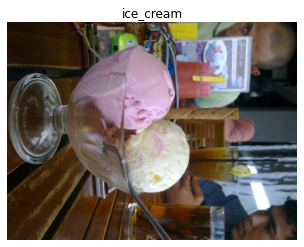

In [6]:
view_random_image(target_dir="10_food_classes_all_data/train/",
                        target_class=random.choice(class_names))

## Process the data

In [7]:
# Load data using keras utilities
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                       seed=42,
                                                       image_size=(224,224),
                                                       batch_size=32)


Found 7500 files belonging to 10 classes.


In [8]:
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                       seed=42,
                                                       image_size=(224,224),
                                                       batch_size=32)

Found 2500 files belonging to 10 classes.


## Build basic keras model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model1 = Sequential([
    tf.keras.layers.Rescaling(1/255., input_shape = (224,224,3)),
    Conv2D(16,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(64, 3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation= "softmax")
])

In [10]:
## Compile the model
model1.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [11]:
history_1 = model1.fit(train_ds, epochs=10,
                       steps_per_epoch=len(train_ds),
                       validation_data=test_ds,
                       validation_steps=len(test_ds))

Epoch 1/10
235/235 [==============================] - 32s 82ms/step - loss: 2.1112 - accuracy: 0.2373 - val_loss: 1.8917 - val_accuracy: 0.3364
Epoch 2/10
235/235 [==============================] - 19s 81ms/step - loss: 1.8123 - accuracy: 0.3676 - val_loss: 1.7623 - val_accuracy: 0.3796
Epoch 3/10
235/235 [==============================] - 20s 85ms/step - loss: 1.5291 - accuracy: 0.4828 - val_loss: 1.7974 - val_accuracy: 0.3916
Epoch 4/10
235/235 [==============================] - 19s 79ms/step - loss: 1.1202 - accuracy: 0.6195 - val_loss: 2.1138 - val_accuracy: 0.3616
Epoch 5/10
235/235 [==============================] - 20s 81ms/step - loss: 0.6789 - accuracy: 0.7741 - val_loss: 2.5740 - val_accuracy: 0.3652
Epoch 6/10
235/235 [==============================] - 20s 84ms/step - loss: 0.3543 - accuracy: 0.8859 - val_loss: 3.3931 - val_accuracy: 0.3496
Epoch 7/10
235/235 [==============================] - 21s 87ms/step - loss: 0.2007 - accuracy: 0.9391 - val_loss: 4.1259 - val_accuracy:

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        1

In [13]:
model1.evaluate(test_ds)

79/79 [==============================] - 5s 53ms/step - loss: 5.3613 - accuracy: 0.3308


[5.361340045928955, 0.33079999685287476]

In [14]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

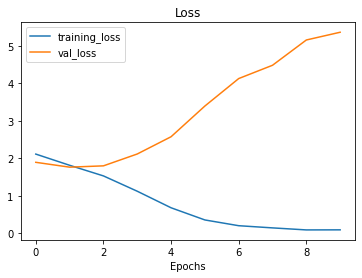

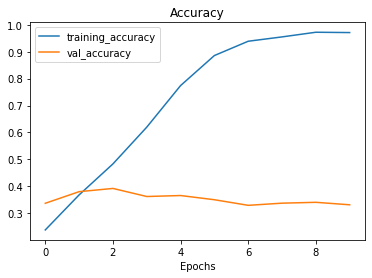

In [15]:
plot_loss_curves(history_1)

#### Validation loss is increasing means that models is overfitting the data

In [16]:
## Using data augmentation
data_augmentation_layer = Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape=(224,224,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [17]:
## Build model_2
model_2 = Sequential([
    data_augmentation_layer,
    tf.keras.layers.Rescaling(1./255),
    Conv2D(16, 3, padding="same", activation="relu", kernel_regularizer = tf.keras.regularizers.L2(0.2)),
    MaxPool2D(),
    Conv2D(32, 3, padding="same", activation="relu", kernel_regularizer = tf.keras.regularizers.L2(0.2)),
    MaxPool2D(),
    Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer = tf.keras.regularizers.L2(0.2)),
    MaxPool2D(),
    tf.keras.layers.Dropout(0.2),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation= "softmax", name="output")
])

In [18]:
# Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer = tf.keras.optimizers.Adam(0.0004),
                metrics = ["accuracy"])

In [19]:
history_2 = model_2.fit(train_ds, epochs = 10,
                        steps_per_epoch= len(train_ds),
                        validation_data = test_ds,
                        validation_steps = len(test_ds))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


235/235 [==============================] - 22s 85ms/step - loss: 6.9172 - accuracy: 0.2097 - val_loss: 3.0751 - val_accuracy: 0.2736
Epoch 2/10
235/235 [==============================] - 20s 85ms/step - loss: 2.5601 - accuracy: 0.2761 - val_loss: 2.3189 - val_accuracy: 0.2632
Epoch 3/10
235/235 [==============================] - 20s 86ms/step - loss: 2.2163 - accuracy: 0.2977 - val_loss: 2.1150 - val_accuracy: 0.3212
Epoch 4/10
235/235 [==============================] - 20s 85ms/step - loss: 2.1249 - accuracy: 0.3043 - val_loss: 2.0737 - val_accuracy: 0.3124
Epoch 5/10
235/235 [==============================] - 20s 83ms/step - loss: 2.0721 - accuracy: 0.3181 - val_loss: 2.0373 - val_accuracy: 0.3344
Epoch 6/10
235/235 [==============================] - 20s 84ms/step - loss: 2.0436 - accuracy: 0.3256 - val_loss: 2.0049 - val_accuracy: 0.3496
Epoch 7/10
235/235 [==============================] - 20s 83ms/step - loss: 2.0207 - accuracy: 0.3296 - val_loss: 1.9945 - val_accuracy: 0.3456
Epo

In [20]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

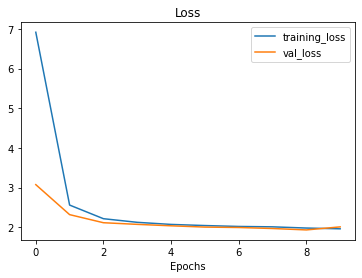

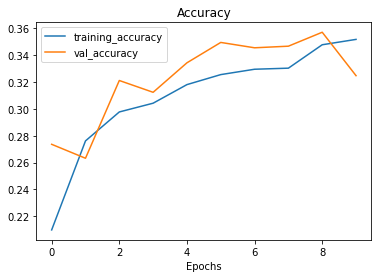

In [21]:
plot_loss_curves(history_2)

In [22]:
model_2.evaluate(test_ds)

79/79 [==============================] - 5s 54ms/step - loss: 2.0101 - accuracy: 0.3248


[2.010094165802002, 0.3248000144958496]

## Try another cnn architecture

In [23]:
model_3 = Sequential([
    data_augmentation_layer,
    tf.keras.layers.Rescaling(1./255, input_shape=(224,224,3)),
    Conv2D(64 ,3 , activation="relu", padding="same"),
    MaxPool2D(),
    Conv2D(128 ,3 , activation="relu", padding="same"),
    Conv2D(128 ,3 , activation="relu", padding="same"),
    MaxPool2D(),
    Conv2D(256 ,3 , activation="relu"),
    Conv2D(256 ,3 , activation="relu"),
    Flatten(),
    Dense(128 , activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    Dense(64 , activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    Dense(10, activation= "softmax", name="output")
])

In [24]:
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [25]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 128)     147584    
                                                      

In [26]:
history_3 = model_3.fit(train_ds, epochs=10,
                        steps_per_epoch= len(train_ds),
                        validation_data= test_ds,
                        validation_steps = len(test_ds))

Epoch 1/10
235/235 [==============================] - 64s 250ms/step - loss: 2.8563 - accuracy: 0.1307 - val_loss: 2.2677 - val_accuracy: 0.1804
Epoch 2/10
235/235 [==============================] - 58s 245ms/step - loss: 2.4372 - accuracy: 0.1557 - val_loss: 3.1290 - val_accuracy: 0.1156
Epoch 3/10
235/235 [==============================] - 59s 249ms/step - loss: 2.3178 - accuracy: 0.1613 - val_loss: 2.1310 - val_accuracy: 0.2064
Epoch 4/10
235/235 [==============================] - 59s 248ms/step - loss: 2.2391 - accuracy: 0.1719 - val_loss: 2.1203 - val_accuracy: 0.2132
Epoch 5/10
235/235 [==============================] - 58s 245ms/step - loss: 2.1952 - accuracy: 0.1791 - val_loss: 2.1009 - val_accuracy: 0.2284
Epoch 6/10
235/235 [==============================] - 57s 240ms/step - loss: 2.1726 - accuracy: 0.1948 - val_loss: 2.1625 - val_accuracy: 0.1864
Epoch 7/10
235/235 [==============================] - 57s 240ms/step - loss: 2.1577 - accuracy: 0.1959 - val_loss: 2.3613 - val_ac

In [27]:
model_3.evaluate(test_ds)

79/79 [==============================] - 7s 80ms/step - loss: 2.0974 - accuracy: 0.2288


[2.097412347793579, 0.2287999987602234]

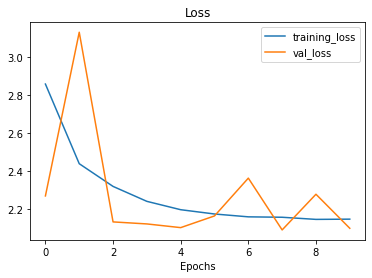

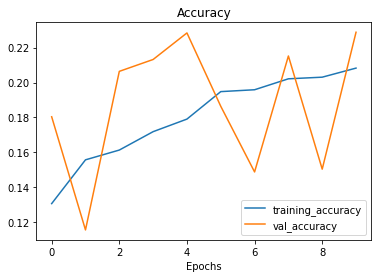

In [28]:
plot_loss_curves(history_3)

## Lets implement our own resnet_34

In [29]:
import tensorflow.keras as keras
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(tf.keras.layers.Layer):
  def __init__(self, filters, strides=1, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.activation = keras.activations.get(activation)
    self.main_layers = [
        DefaultConv2D(filters, strides= strides),
        keras.layers.BatchNormalization(),
        self.activation,
        DefaultConv2D(filters),
        keras.layers.BatchNormalization()
    ]
    self.skip_layers = []
    if strides>1:
      self.skip_layers = [
          DefaultConv2D(filters, kernel_size=1, strides= strides),
          keras.layers.BatchNormalization()
      ]
    
    def call(self, inputs):
      Z = inputs
      for layer in self.main_layers:
        Z = layer(Z)
      skip_Z = inputs
      for layer in self.skip_layers:
        skip_Z = layer(skip_Z)
      return self.activation(Z + skip_Z)


In [30]:
model_4 = keras.models.Sequential()
model_4.add(DefaultConv2D(64, kernel_size=7, strides=2,
                          input_shape=[224,224,3]))
model_4.add(keras.layers.BatchNormalization())
model_4.add(keras.layers.Activation("relu"))
model_4.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters=64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
  strides = 1 if filters == prev_filters else 2
  model_4.add(ResidualUnit(filters, strides = strides))
  prev_filter = filters
model_4.add(keras.layers.GlobalAvgPool2D())
model_4.add(keras.layers.Flatten())
model_4.add(keras.layers.Dense(10, activation="softmax"))

In [31]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      9408      
                                                                 
 batch_normalization_2 (Batc  (None, 112, 112, 64)     256       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 residual_unit (ResidualUnit  (None, 56, 56, 64)       0         
 )                                                               
                                                      

In [32]:
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = keras.optimizers.Adam(0.1),
                metrics = ["accuracy"])

In [33]:
model_4.fit(train_ds,
            epochs=10,
            steps_per_epoch = len(train_ds),
            validation_data = test_ds,
            validation_steps = len(test_ds))

Epoch 1/10
235/235 [==============================] - 20s 81ms/step - loss: 2.2893 - accuracy: 0.1557 - val_loss: 2.2279 - val_accuracy: 0.1696
Epoch 2/10
235/235 [==============================] - 19s 81ms/step - loss: 2.2275 - accuracy: 0.1729 - val_loss: 2.2312 - val_accuracy: 0.1960
Epoch 3/10
235/235 [==============================] - 19s 81ms/step - loss: 2.2118 - accuracy: 0.1792 - val_loss: 2.2405 - val_accuracy: 0.1772
Epoch 4/10
235/235 [==============================] - 19s 80ms/step - loss: 2.2159 - accuracy: 0.1779 - val_loss: 2.2748 - val_accuracy: 0.1688
Epoch 5/10
235/235 [==============================] - 19s 80ms/step - loss: 2.2082 - accuracy: 0.1849 - val_loss: 2.2619 - val_accuracy: 0.1792
Epoch 6/10
235/235 [==============================] - 19s 79ms/step - loss: 2.2085 - accuracy: 0.1879 - val_loss: 2.2149 - val_accuracy: 0.2000
Epoch 7/10
235/235 [==============================] - 19s 79ms/step - loss: 2.2077 - accuracy: 0.1795 - val_loss: 2.1973 - val_accuracy:

## Lets use transfer learning

In [34]:
import tensorflow_hub as hub
from tensorflow.keras import layers

efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"


In [35]:
def create_model(model_url, num_classes=10):
  """
  Takes the tensorflow hub url and creates a Sequential model with it

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224,224,3))
  
  model = tf.keras.Sequential([
      tf.keras.layers.Rescaling(1./255, input_shape=(224,224,3)),
      feature_extractor_layer,
      layers.Dense(num_classes, activation='softmax', name='output_layer') 
  ])

  return model

In [36]:
efficientnet_model = create_model(efficientnet_url,10)

In [44]:
## compile the model

efficientnet_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"])

In [45]:
efficientnet_history = efficientnet_model.fit(train_ds, epochs = 10,
                                              steps_per_epoch = len(train_ds),
                                              validation_data = test_ds,
                                              validation_steps = len(test_ds))

Epoch 1/10
235/235 [==============================] - 31s 122ms/step - loss: 0.2196 - accuracy: 0.9440 - val_loss: 0.4129 - val_accuracy: 0.8640
Epoch 2/10
235/235 [==============================] - 22s 93ms/step - loss: 0.2102 - accuracy: 0.9491 - val_loss: 0.4142 - val_accuracy: 0.8652
Epoch 3/10
235/235 [==============================] - 22s 92ms/step - loss: 0.2018 - accuracy: 0.9528 - val_loss: 0.4152 - val_accuracy: 0.8684
Epoch 4/10
235/235 [==============================] - 23s 96ms/step - loss: 0.1946 - accuracy: 0.9547 - val_loss: 0.4197 - val_accuracy: 0.8664
Epoch 5/10
235/235 [==============================] - 22s 92ms/step - loss: 0.1872 - accuracy: 0.9592 - val_loss: 0.4205 - val_accuracy: 0.8624
Epoch 6/10
235/235 [==============================] - 22s 94ms/step - loss: 0.1806 - accuracy: 0.9601 - val_loss: 0.4227 - val_accuracy: 0.8648
Epoch 7/10
235/235 [==============================] - 27s 112ms/step - loss: 0.1757 - accuracy: 0.9627 - val_loss: 0.4234 - val_accurac

In [46]:
efficientnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 feature_extraction_layer (K  (None, 1280)             5919312   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 12,810
Non-trainable params: 5,919,312
_________________________________________________________________


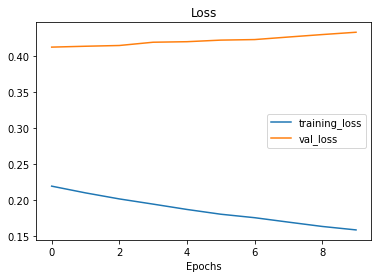

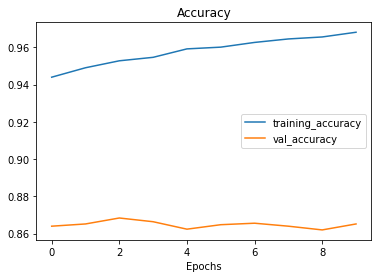

In [47]:
plot_loss_curves(efficientnet_history)

## Thats awsome using transfer learning we reach 86 % validation accuracy

In [61]:
from tensorflow.keras import layers

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2L(include_top=False, input_shape=(224,224,3))
base_model.trainable= False

input_layer = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

x = data_augmentation_layer(input_layer)

# x = tf.keras.layers.Rescaling(1./255, input_shape=(224,224,3))(input_layer)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

output = layers.Dense(10, activation = "softmax", name="output")(x)

efficient_net_v2 = tf.keras.Model(input_layer , output)

In [62]:
## compile the model
efficient_net_v2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["accuracy"])

In [63]:
efficient_net_v2.fit(train_ds, epochs = 10,
                     steps_per_epoch = len(train_ds),
                     validation_data = test_ds,
                     validation_steps = len(test_ds))

Epoch 1/10
235/235 [==============================] - 149s 537ms/step - loss: 0.9440 - accuracy: 0.7205 - val_loss: 0.5077 - val_accuracy: 0.8444
Epoch 2/10
235/235 [==============================] - 120s 510ms/step - loss: 0.6037 - accuracy: 0.8136 - val_loss: 0.4230 - val_accuracy: 0.8688
Epoch 3/10
235/235 [==============================] - 124s 528ms/step - loss: 0.5402 - accuracy: 0.8288 - val_loss: 0.3902 - val_accuracy: 0.8748
Epoch 4/10
235/235 [==============================] - 124s 525ms/step - loss: 0.4991 - accuracy: 0.8421 - val_loss: 0.3724 - val_accuracy: 0.8748
Epoch 5/10
235/235 [==============================] - 122s 516ms/step - loss: 0.4708 - accuracy: 0.8472 - val_loss: 0.3529 - val_accuracy: 0.8860
Epoch 6/10
235/235 [==============================] - 123s 523ms/step - loss: 0.4516 - accuracy: 0.8528 - val_loss: 0.3493 - val_accuracy: 0.8776
Epoch 7/10
235/235 [==============================] - 124s 526ms/step - loss: 0.4293 - accuracy: 0.8599 - val_loss: 0.3330 -

In [64]:
efficient_net_v2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-l (Functiona  (None, 7, 7, 1280)       117746848 
 l)                                                              
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output (Dense)              (None, 10)                12810     
                                                                 
Total params: 117,759,658
Trainable params: 12,810
Non-trai

## almost 90 % validation accuracy